In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('wind2019.csv')
df.head(100)

In [ ]:
idx_df = df.set_index(['时间'])
idx_df.describe().T  #用于计算数值列的描述性统计信息，如计数、均值、标准差、最小值、最大值等

In [ ]:
idx_df.head(10)

In [ ]:
idx_df.isnull().sum()#DataFrame 中每列的缺失值数量。通过这个操作，您可以了解每列中缺失值的分布情况，并进行进一步的数据清洗或处理。

In [ ]:
import matplotlib.font_manager as font_manager

# 指定中文字体文件路径
font_path = 'C:/Windows/Fonts/simsun.ttc'

# 加载中文字体
prop = font_manager.FontProperties(fname=font_path)

# 设置中文字体为默认字体
plt.rcParams['font.family'] = prop.get_name()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(idx_df.corr(),ax=ax,annot = True)

In [ ]:
idx_df.corr()['实际发电功率（mw）'].sort_values(ascending=False)

In [ ]:
idx_df.shape

In [ ]:
idx_df.info()

In [12]:

df2 = idx_df.drop(['测风塔50m风向(°)','测风塔10m风向(°)'],axis=1)

x = df2.iloc[:,:].values #转化成numpy类型
print(x)
print(x.shape)

[[2.23000000e-01 0.00000000e+00 0.00000000e+00 ... 8.98710000e+02
  5.34970000e+01 9.79591000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.98621000e+02
  5.59990000e+01 1.15098400e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.98497000e+02
  5.77470000e+01 1.06616200e+00]
 ...
 [7.46400000e+00 8.15300000e+00 8.76500000e+00 ... 8.88383000e+02
  4.11360000e+01 1.34717210e+02]
 [5.70500000e+00 7.15800000e+00 8.07600000e+00 ... 8.88389000e+02
  4.12880000e+01 1.26557410e+02]
 [7.15800000e+00 8.00000000e+00 9.68300000e+00 ... 8.88469000e+02
  4.01230000e+01 1.09673615e+02]]
(35040, 8)


In [13]:
from sklearn.preprocessing import MinMaxScaler
x_sc = MinMaxScaler()
x = x_sc.fit_transform(x)
# print(x.shape)
# print(x)

# 获取归一化时用的最大值和最小值
max_values = x_sc.data_max_
min_values = x_sc.data_min_

# 打印每个特征的最大值和最小值
for feature, max_val, min_val in zip(range(len(max_values)), max_values, min_values):
    print(f"Feature {feature}: Max Value = {max_val}, Min Value = {min_val}")

Feature 0: Max Value = 19.246, Min Value = 0.0
Feature 1: Max Value = 21.055999999999997, Min Value = 0.0
Feature 2: Max Value = 22.381999999999998, Min Value = 0.0
Feature 3: Max Value = 360.0, Min Value = 0.0
Feature 4: Max Value = 40.131, Min Value = -18.662
Feature 5: Max Value = 905.307, Min Value = 874.584
Feature 6: Max Value = 94.921, Min Value = 2.506
Feature 7: Max Value = 202.22884, Min Value = 0.25836


In [14]:
# 滑动窗口截取数据

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step) # step表示滑动步长
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [15]:
past_history = 8  #2小时观测值
future_target = 0  #下一个时间点的
STEP = 1

x_train_single, y_train_single = multivariate_data(x, x[:, -1], 0,
                                                   24528, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(x, x[:, -1],
                                              24528 , 31536, past_history,
                                               future_target, STEP,
                                               single_step=True)
x_test_single, y_test_single = multivariate_data(x, x[:, -1],
                                               31536, None, past_history,
                                               future_target, STEP,
                                               single_step=True)
print(x_train_single.shape)
print(y_train_single)
print(x_val_single.shape)
print(x_test_single.shape)
print(x_train_single)
print(y_test_single.shape)

(24520, 8, 8)
[0.05500251 0.0544244  0.04823228 ... 0.0103412  0.0256572  0.02965432]
(7000, 8, 8)
(3496, 8, 8)
[[[0.01158682 0.         0.         ... 0.78527488 0.55176108 0.00357097]
  [0.         0.         0.         ... 0.78237802 0.5788346  0.00441958]
  [0.         0.         0.         ... 0.77834196 0.59774928 0.0039996 ]
  ...
  [0.08708303 0.02469605 0.05893128 ... 0.76854474 0.5250771  0.00557941]
  [0.13743115 0.06990881 0.09083192 ... 0.76463887 0.55284315 0.02440529]
  [0.09768264 0.13046163 0.10450362 ... 0.76017967 0.56371801 0.04186594]]

 [[0.         0.         0.         ... 0.78237802 0.5788346  0.00441958]
  [0.         0.         0.         ... 0.77834196 0.59774928 0.0039996 ]
  [0.04250234 0.         0.         ... 0.77287374 0.55895688 0.00329433]
  ...
  [0.13743115 0.06990881 0.09083192 ... 0.76463887 0.55284315 0.02440529]
  [0.09768264 0.13046163 0.10450362 ... 0.76017967 0.56371801 0.04186594]
  [0.08708303 0.12077318 0.11361809 ... 0.75484165 0.5569983

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,Input, Conv1D,Multiply,Flatten,MaxPooling1D,concatenate
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout,Permute,Lambda,RepeatVector
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

D:\JetBrains\ANACONDA\envs\py37\lib\site-packages\requests\__init__.py:114: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.2.0) doesn't match a supported version!
  RequestsDependencyWarning,


In [17]:
# callbacks_list=[   
# #     ReduceLROnPlateau(
# #     monitor='val_loss',  # 监控验证集上的损失
# #     factor=0.5,  # 学习率调整的因子
# #     patience=3,  # 等待的轮数
# #     min_lr=0.00001,  # 学习率的下限
# #     verbose=1  # 打印相关信息
# #  ),
#     ModelCheckpoint(
#         filepath='my_model.h5',#模型保存路径
#         monitor='val_loss',#检测验证集损失值
#         save_best_only=True#是否只保存最佳模型
#     )

# ]


def double_CNN_GRU():
    visible1 = Input(shape=(8, 8))
    cnn1 = Conv1D(filters=8, kernel_size=1, activation='relu')(visible1)   #output_length = seq_length - kernel_size + 1=24-3+1=22  (22,8)
    cnn1 = MaxPooling1D(pool_size=2)(cnn1)  #output_length = ceil(seq_length / pool_size)=22/2=11   (11,8)
    cnn2 = Conv1D(filters=16, kernel_size=3, activation='relu')(cnn1)  #11-3+1=9   (9,16)
    cnn2 = MaxPooling1D(pool_size=2)(cnn2)   # (9/2,16)=(4,16)
    cnn = Flatten()(cnn2)  #4*16=64
    
    visible2 = Input(shape=(8, 8))  
    gru1 = GRU(units=32, return_sequences=True,kernel_regularizer=tf.keras.regularizers.l2(0.01))(visible2)   #(24,32)
    gru2 = GRU(units=16, return_sequences=False,kernel_regularizer=tf.keras.regularizers.l2(0.01),)(gru1)
    gru = Flatten()(gru2)
    
    merge = concatenate([cnn, gru])
    
#     means = Lambda(lambda x: K.mean(x, axis=1))(merge)
    attention_probs = Dense(32, activation='sigmoid', name='attention_vec')(merge)
    attention_mul = Multiply()([merge, attention_probs])
    
    
    F = Flatten()(attention_mul)
    dense = Dense(units=64, activation='relu')(F)
    output = Dense(units=1,activation='relu')(dense)
    model = Model(inputs=[visible1, visible2], outputs=output)
    adam = Adam(learning_rate=0.001)
    return model

In [18]:
m = double_CNN_GRU()
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 8)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 8, 8)         72          ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 4, 8)         0           ['conv1d[0][0]']                 
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 8)]       0           []                               
                                                                                              

In [19]:
m.compile(optimizer='adam', loss='mse',metrics = [tf.keras.metrics.RootMeanSquaredError()])
hist = m.fit([x_train_single,x_train_single],y_train_single,epochs=100, batch_size=128,  validation_data=([x_val_single,x_val_single], y_val_single),verbose=1)

Epoch 1/100
192/192 [==============================] - 5s 10ms/step - loss: 0.2541 - root_mean_squared_error: 0.1473 - val_loss: 0.0642 - val_root_mean_squared_error: 0.0750
Epoch 2/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0280 - root_mean_squared_error: 0.0800 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0658
Epoch 3/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0077 - root_mean_squared_error: 0.0750 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0620
Epoch 4/100
192/192 [==============================] - 1s 8ms/step - loss: 0.0056 - root_mean_squared_error: 0.0722 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0614
Epoch 5/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0698 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0595
Epoch 6/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0034

192/192 [==============================] - 1s 7ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0439
Epoch 96/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 97/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0429
Epoch 98/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0433
Epoch 99/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 100/100
192/192 [==============================] - 1s 7ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0019 - val_

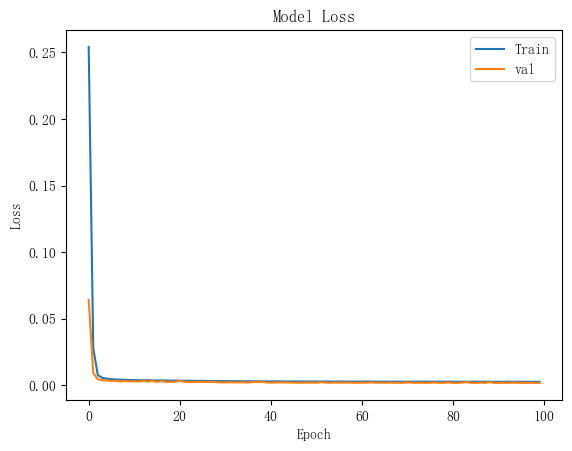

In [20]:
# 绘制损失函数曲线
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [21]:
y_pred = m.predict([x_test_single,x_test_single])

110/110 [==============================] - 1s 2ms/step


In [22]:
print(y_pred)

max_target =202.22884  # 原始数据中的最大值
min_target =0.25836  # 原始数据中的最小值

y_pred_unnormalized = y_pred * (max_target - min_target) + min_target

y_test_single_unnormalized = y_test_single * (max_target - min_target) + min_target



y_pred_original = y_pred_unnormalized
y_test_original = y_test_single_unnormalized

print(y_pred_original)

[[0.34460235]
 [0.28830487]
 [0.1320663 ]
 ...
 [0.6575875 ]
 [0.6613711 ]
 [0.668671  ]]
[[ 69.857864]
 [ 58.48743 ]
 [ 26.931852]
 ...
 [133.07162 ]
 [133.8358  ]
 [135.31017 ]]


In [23]:
# 计算均方误差 (MSE) 和均方根误差 (RMSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,explained_variance_score


# 计算NRMSE
def normalized_root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    range_y = np.max(y_true) - np.min(y_true)
    return rmse / range_y

mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
# 计算 MBE
mbe = np.mean(y_test_original - y_pred_original)
nrmse = normalized_root_mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
evs = explained_variance_score(y_test_original, y_pred_original)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Bias Error(MBE):",mbe)
print("NRMSE:", nrmse)
print("Explained Variance Score (EVS):", evs)
print("R² Score:", r2)

Mean Squared Error (MSE): 75.74901619878577
Root Mean Squared Error (RMSE): 8.703391074678063
Mean Absolute Error (MAE): 4.8399065020654
Mean Bias Error(MBE): 0.1989245311826319
NRMSE: 0.043153521165025785
Explained Variance Score (EVS): 0.9632822058671878
R² Score: 0.9632630146197435


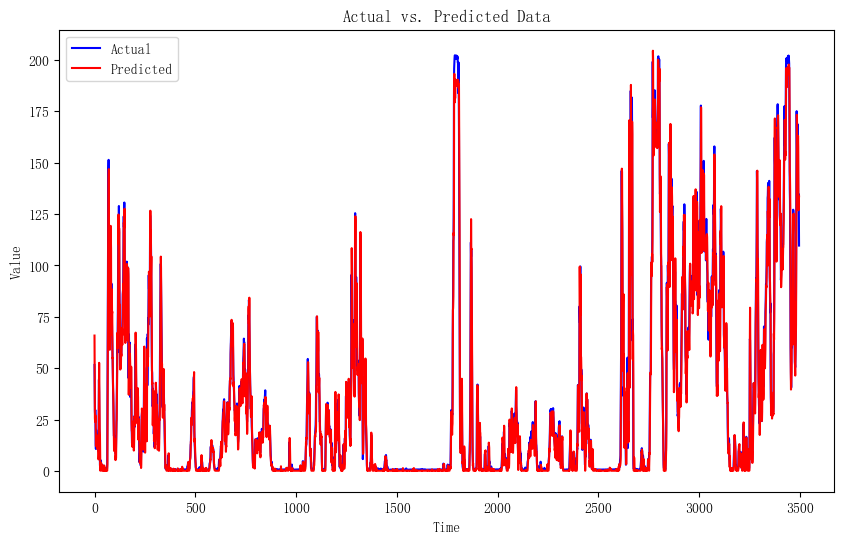

'\nMean Squared Error (MSE): 6.493102995726674\nRoot Mean Squared Error (RMSE): 2.5481567839767383\nMean Absolute Error (MAE): 1.0492490077929333\nMean Bias Error(MBE): 0.031978089046465534\nNRMSE: 0.0539110592489826\nExplained Variance Score (EVS): 0.9659083570720376\nR² Score: 0.9659029871366942\n'

In [39]:
# 创建一个新图表
plt.figure(figsize=(10, 6))

# 绘制 y_test_original（蓝色折线）
plt.plot(y_test_original, label='Actual', color='blue')

# 绘制 y_pred_original（红色折线）
plt.plot(y_pred_original, label='Predicted', color='red')

# 添加图例
plt.legend()

# 设置横轴和纵轴标签
plt.xlabel('Time')
plt.ylabel('Value')

# 设置图表标题
plt.title('Actual vs. Predicted Data')

# 显示图表
plt.show()


'''

'''